# Test Notebook

- Encode/Decode Cycle: https://stackoverflow.com/questions/15304229/convert-python-elementtree-to-string

In [1]:
import lxml
from lxml import etree, html
import numpy as np
import pandas as pd
import sys
import os

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from app.utils import (clean_boilerplate, 
                       clean_website, 
                       detect_XML, 
                       extract_tree,
                       remove_tags, 
                       tokenizing_html, 
                       trim_html)

## Coefs

In [38]:
df = pd.read_csv("../results/coefs.csv", index_col="class")

In [39]:
df.head(1)

00       000      0000     00000      0004      0031  \
class                                                                    
Automotive  0.339394  0.012383 -0.003252 -0.006503  0.021161  0.140413   

                0032       004     0043      0049  ...      生まれる  \
class                                              ...             
Automotive -0.006013  0.015174 -0.00306  0.122049  ... -0.003006   

            私たちはビジネスの本質的価値を最大化するため      秋川牧園   管理職15名で    組織支援など  解決する力があります  \
class                                                                          
Automotive               -0.003006 -0.006013 -0.006013 -0.003006   -0.003006   

                証明する     領域を跨ぎ   香港特別行政區       한국어  
class                                               
Automotive -0.003006 -0.003006 -0.010149 -0.008079  

[1 rows x 15565 columns]

In [40]:
df

00       000      0000     00000  \
class                                                                          
Automotive                            0.339394  0.012383 -0.003252 -0.006503   
Construction                         -0.076258 -0.020980 -0.002041 -0.004082   
Consumer Goods                        0.163685 -0.070105 -0.003342 -0.006683   
Financial Services                   -0.090814 -0.088201 -0.001387 -0.002773   
Information Technology and Services  -0.280612  0.229451 -0.008695 -0.017390   
Insurance                             0.252179 -0.010849 -0.000769 -0.001537   
Leisure, Travel & Tourism             0.046118 -0.048180 -0.001400 -0.002801   
Logistics and Supply Chain           -0.025095  0.034524 -0.000281 -0.000562   
Machinery                            -0.014147 -0.035924 -0.001729 -0.003458   
Management Consulting                 0.001230 -0.025587 -0.003206 -0.006411   
Marketing and Advertising            -0.095401 -0.019321  0.040748  0.081495   
Mechanical or Industrial Engineering -0.051036  0.059995 -0.001045 -0.002090   
Media Production                     -0.099498 -0.034213 -0.004824 -0.009649   
Medical Practice                     -0.052234 -0.087794 -0.001948 -0.003896   
Real Estate                          -0.090721  0.014021 -0.002895 -0.005790   
Renewables & Environment             -0.030156 -0.012279 -0.001390 -0.002779   
Telecommunications                   -0.045963  0.023440  0.000000  0.000000   
Wholesale                            -0.064471  0.004616 -0.002374 -0.004748   

                                          0004      0031      0032       004  \
class                                                                          
Automotive                            0.021161  0.140413 -0.006013  0.015174   
Construction                         -0.000437 -0.006761 -0.000820 -0.000602   
Consumer Goods                       -0.002934 -0.024710 -0.010094 -0.001999   
Financial Services                   -0.002144 -0.005817 -0.005011 -0.000563   
Information Technology and Services  -0.005000 -0.032232  0.066260 -0.002844   
Insurance                            -0.002555 -0.010533 -0.001830 -0.001049   
Leisure, Travel & Tourism            -0.001401 -0.006212 -0.003754 -0.000919   
Logistics and Supply Chain           -0.000317 -0.002776 -0.002472 -0.000446   
Machinery                            -0.001955 -0.014667 -0.005384 -0.001428   
Management Consulting                -0.000754 -0.006714 -0.004151 -0.000969   
Marketing and Advertising            -0.001861 -0.016790 -0.018511 -0.001723   
Mechanical or Industrial Engineering -0.001238 -0.004072 -0.003696 -0.000503   
Media Production                     -0.001348 -0.007526 -0.009670 -0.000846   
Medical Practice                     -0.001016 -0.002765 -0.002037 -0.000655   
Real Estate                          -0.001223 -0.008664 -0.002997 -0.000802   
Renewables & Environment             -0.000518 -0.006281 -0.001622 -0.000922   
Telecommunications                   -0.001278 -0.006238 -0.004637 -0.000498   
Wholesale                            -0.000511 -0.007209 -0.001197 -0.000943   

                                          0043          0049  ...      生まれる  \
class                                                         ...             
Automotive                           -0.003060  1.220495e-01  ... -0.003006   
Construction                         -0.002414 -5.916097e-03  ... -0.000410   
Consumer Goods                       -0.003826 -2.173591e-03  ... -0.005047   
Financial Services                   -0.000350 -4.398215e-03  ... -0.002505   
Information Technology and Services  -0.006835 -3.257745e-02  ...  0.033130   
Insurance                            -0.001622 -4.008082e-03  ... -0.000915   
Leisure, Travel & Tourism             0.031186 -6.226058e-03  ... -0.001877   
Logistics and Supply Chain           -0.000709 -9.266982e-04  ... -0.001236   
Machinery                            -0.002482 -8.90

In [10]:
df.abs().head(1)

00       000      0000     00000      0004      0031      0032  \
0  0.339393  0.012385  0.003251  0.006503  0.021161  0.140413  0.006012   

        004     0043     0049  ...      生まれる  私たちはビジネスの本質的価値を最大化するため  \
0  0.015174  0.00306  0.12205  ...  0.003006                0.003006   

       秋川牧園   管理職15名で    組織支援など  解決する力があります      証明する     領域を跨ぎ   香港特別行政區  \
0  0.006012  0.006012  0.003006    0.003006  0.003006  0.003006  0.010149   

        한국어  
0  0.008079  

[1 rows x 15565 columns]

In [60]:

# automatically select the number of features for RFE
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
# create pipeline
rfe = RFECV(estimator=DecisionTreeClassifier())
model = DecisionTreeClassifier()
pipeline = Pipeline(steps=[('s',rfe),('m',model)])
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.888 (0.028)


In [83]:
import pandas as pd

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE, RFECV
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import TfidfVectorizer

In [103]:
USECOLS = ["text", "group_representative_label"]
DATA_DIR_PATH = "../data/"
TRAIN_PATH_CSV = DATA_DIR_PATH + "ctrain" +".csv"
TEST_PATH_CSV = DATA_DIR_PATH + "ctest" + ".csv"
TEXT_COL = "text"
CLASS_COL = "group_representative_label"
CLASS_NAMES = "group_representative_label"

train = pd.read_csv(TRAIN_PATH_CSV, nrows=100, usecols=USECOLS).fillna("")
test = pd.read_csv(TEST_PATH_CSV, nrows=100, usecols=USECOLS).fillna("")

X_train = train[TEXT_COL]
y_train = train[CLASS_COL]
y_train_labels = train[CLASS_NAMES]

X_test = test[TEXT_COL]
y_test = test[CLASS_COL]
y_test_labels = test[CLASS_NAMES]

vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)

In [105]:
len(vectorizer.vocabulary_)

15565

In [107]:
%%time

rfe = RFE(estimator=LinearSVC(), n_features_to_select=None)
#pipe = Pipeline([("vectorizer", TfidfVectorizer()), ("clf", rfe)])
rfe.fit(X_train, y_train)

CPU times: user 3min 25s, sys: 104 ms, total: 3min 25s
Wall time: 3min 25s


RFE(estimator=LinearSVC())

In [116]:
feature_names = np.array(vectorizer.get_feature_names())
kept_features = feature_names[rfe.support_]

In [132]:
"004" in kept_features

False

In [118]:
c = 0
for element in feature_names:
    if element not in kept_features:
        print(element)
        c += 1
    if c>=15:
        break

0004
004
0043
012
0173
01992
0221
02627
041
0421
050
0561
06652
087598
09126


In [108]:
rfe.support_

array([ True,  True,  True, ..., False,  True,  True])

In [110]:
rfe.ranking_

array([  1,   1,   1, ..., 784,   1,   1])

In [97]:
# transform the data
X_train = rfe.transform(X_train)

In [98]:
X_train.shape

(10, 5)

In [82]:
%%time

rfe = RFECV(estimator=LinearSVC(), min_features_to_select=1000)
model = LinearSVC()
pipeline = Pipeline(steps=[("v", TfidfVectorizer()),('s',rfe),('m',model)])
# evaluate model
#cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X_train, y_train, scoring='accuracy', 
                           cv=2, n_jobs=1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

/home/jpaulus/miniconda3/envs/industry/lib/python3.9/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(("The least populated class in y has only %d"


ValueError: n_splits=5 cannot be greater than the number of members in each class.

In [ ]:
for i in range(X_train.shape[1]):
    print('Column: %d, Selected %s, Rank: %.3f' % (i, rfe.support_[i], rfe.ranking_[i]))

In [58]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
# create pipeline
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=5)
model = DecisionTreeClassifier()
pipeline = Pipeline(steps=[('s',rfe),('m',model)])
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.884 (0.033)


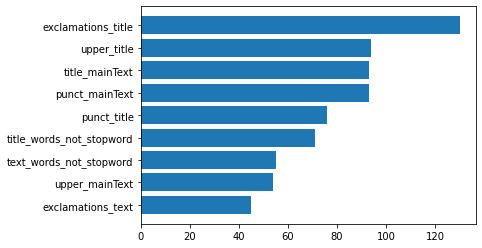

In [41]:
import numpy as np
import matplotlib.pyplot as plt

def f_importances(coef, names):
    imp = coef
    imp,names = zip(*sorted(zip(imp,names)))
    plt.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)), names)
    plt.show()

features_names = ['title_mainText', 'upper_title', 'upper_mainText', 'punct_title', 'punct_mainText',
                  'exclamations_title', 'exclamations_text', 'title_words_not_stopword', 'text_words_not_stopword']

n_classes = 4
n_features = len(features_names)

clf_coef_ = np.random.randint(1, 30, size=(int(0.5*n_classes*(n_classes-1)), n_features))

f_importances(clf_coef_.sum(axis=0), features_names)

In [42]:
clf_coef_

array([[ 7, 16, 10, 25,  1, 18,  2, 25,  7],
       [ 9, 18,  2,  3, 21, 27,  1,  2, 26],
       [28, 21,  1,  2, 21, 13,  5, 21,  1],
       [ 5, 17, 17,  6,  9, 26, 22,  5, 18],
       [23, 16,  8, 25, 27, 28,  8,  9,  1],
       [21,  6, 16, 15, 14, 18,  7,  9,  2]])

In [55]:
sorted_df = pd.DataFrame(df.abs().sum(axis=0), 
                         columns=["values"]).sort_values(by="values", ascending=False)

In [57]:
sorted_df.tail(20)

values
spannende         0.011161
klicks            0.011161
programmed        0.011161
northern          0.011161
signing           0.011161
registering       0.011161
sdk               0.011161
portalen          0.011161
serif             0.011161
src               0.011161
color             0.011161
desired           0.011161
agreeing          0.011161
var               0.011161
gründungstreffen  0.011161
alarmierung       0.011161
ressourcen        0.011161
schaltfläche      0.011161
faktorbasierte    0.011161
securing          0.011161

In [11]:
import numpy as np
X = np.array([[3,4],[1,4],[2,3],[6,-1],[7,-1],[5,-3]] )
y = np.array([-1,-1, -1, 1, 1 , 1 ])

In [24]:
from sklearn.svm import SVC, LinearSVC
clf = SVC(C = 1e5, kernel = 'linear')
clf = LinearSVC(C = 1e5, dual=False)
clf.fit(X, y) 
print('w = ',clf.coef_)
print('b = ',clf.intercept_)

w =  [[ 0.10857351 -0.39142628]]
b =  [-0.04286763]


In [22]:
print('Indices of support vectors = ', clf.support_)
print('Support vectors = ', clf.support_vectors_)
print('Number of support vectors for each class = ', clf.n_support_)
print('Coefficients of the support vector in the decision function = ', np.abs(clf.dual_coef_))

Indices of support vectors =  [2 3]
Support vectors =  [[ 2.  3.]
 [ 6. -1.]]
Number of support vectors for each class =  [1 1]
Coefficients of the support vector in the decision function =  [[0.0625 0.0625]]


### Loading

In [2]:
DATA_DIR_PATH = "../data/"
LANG = ""

TRAIN_PATH_CSV = DATA_DIR_PATH + "train" + LANG + ".csv"
TEST_PATH_CSV = DATA_DIR_PATH + "test" + LANG + ".csv"

N = 0

In [3]:
%%time
train = pd.read_csv(TRAIN_PATH_CSV)

CPU times: user 7.37 s, sys: 1.09 s, total: 8.46 s
Wall time: 8.45 s


In [57]:
%%time

### sample dataframe ###
import random
p = 0.1
train = pd.read_csv(
         TRAIN_PATH_CSV,
         header=0, 
         skiprows=lambda i: i>0 and random.random() > p
)

CPU times: user 2.44 s, sys: 275 ms, total: 2.71 s
Wall time: 2.71 s


In [58]:
train.head(1)

url  industry      industry_label      group  \
0  http://www.energy-net.de         8  Telecommunications  gov, tech   

   group_representative                                               html  \
0                     8  <html><head><title>Energy Net Apple Reseller</...   

                                                text source country  \
0  Energy Net Apple Reseller\n\nSpringe zum Inhal...   xing      DE   

  group_representative_label  
0         Telecommunications

## Test meta

In [2]:
sample_df = pd.read_json("../data/data.ndjson", nrows=1000, lines=True)
sample_df.head(1)

url  industry industry_label            group  \
0  http://12-18.com        31    Hospitality  rec, serv, tran   

   group_representative                                               html  \
0                    30  <!DOCTYPE html>\n<html lang="de">\n<head>\n\t<...   

                                                text source  
0  12.18. Investment Management - ANDERS. AUS PRI...   xing

In [3]:
from lxml.html.clean import Cleaner
from lxml import html, etree

cleaner = Cleaner(
            scripts=True,
            javascript=True,
            comments=True,
            style=True,
            inline_style=True,
            links=True,
            meta=False,
            page_structure=False,
            processing_instructions=True,
            embedded=True,
            frames=True,
            forms=True,
            annoying_tags=True,
            remove_tags=None,
            allow_tags=None,
            kill_tags=["img"],
            remove_unknown_tags=True,
            safe_attrs_only=True,
            safe_attrs=["property", "name", "content"],  # No Attribute saving
            add_nofollow=False,
            host_whitelist=(),
            whitelist_tags=set(["embed", "iframe"]),
        )

In [4]:
html_file = sample_df.iloc[0].html
url = sample_df.iloc[0].url

cleaned_html = clean_boilerplate(html_file, url, cleaner=cleaner)

In [5]:
test_html = trim_html(cleaned_html, 
                      clean_html=False, 
                      keep_tags=True, 
                      element_list=["meta"], 
                      return_tree=False)

test_html_tree = trim_html(cleaned_html, 
                      clean_html=False, 
                      keep_tags=True, 
                      element_list=["meta"], 
                      return_tree=True)

In [31]:
print(etree.tostring(etree.HTML(html_file), pretty_print=True, encoding="unicode"))

<html lang="de">
<head>
	<title>12.18. Investment Management - ANDERS. AUS PRINZIP.</title>
	<link rel="shortcut icon" href="https://12-18.com/media/5dce9543a08cf.png" type="image/x-icon"/>
	<link rel="stylesheet" href="https://12-18.com/designs/1218/allstyles.css?v=1618483612" type="text/css" async=""/>
	<meta name="viewport" content="width=device-width, initial-scale=1, maximum-scale=1, user-scalable=0"/>
	<meta http-equiv="Content-type" content="text/html;charset=utf-8"/>
	
	<script type="text/javascript">
	var gaProperty = 'UA-85325128-1', fbProperty = '';
	var pagesLanguage = 'de', pagesUser = '', pagesModul = 'home', pagesModulName = 'home', pagesModulId = '1', pagesModulTid = '';
	var pagesPagepath = 'https://12-18.com', pagesPageurl = 'https://12-18.com/de/home', pagesPagelanguage = 'https://12-18.com/de';
	var pagesPush = 0;
	var pagesPh = false;
	var pagesAdmin = false;
	var pagesEncode = true;
	var pagesGetEncode = true;
	var pagesScreen = 0;
	var pagesPrivacy = '1,0,0,0', p

### CSSSelector

In [55]:
sample_df.head(1)

url  industry industry_label            group  \
0  http://12-18.com        31    Hospitality  rec, serv, tran   

   group_representative                                               html  \
0                    30  <!DOCTYPE html>\n<html lang="de">\n<head>\n\t<...   

                                                text source         tmp  \
0  12.18. Investment Management - ANDERS. AUS PRI...   xing  <!DOCTYPE    

                                                meta  
0  Ein glückliches Investment ist das Resultat ha...

html
html
html
html
html
html
html
html
html
html
html
html
html
html
html
html
html
html
html
html
html
html
html
html
html
html
html
html
html
html
html
xml
html
html
html
html
html
html
html
html
html
html
html
html
html
html
html
html
html
html
html
html
html
html
html
html
html
html
html
html
html
html
html
html
html
html
html
html
html
html
html
html
html
html
html
html
html
html
html
html
html
html
html
html
html
html
html
html
html
html
html
html
html
html
html
html
html
html
html
html
html
html
html
html
html
html
html
html
html
html
html
html
html
html
html
html
html
html
html
html
html
xml
html
html
html
html
html
html
html
html
html
html
html
html
html
html
html
html
html
html
html
html
html
html
html
html
html
html
html
html
html
html
html
html
html
html
html
html
html
html
html
html
html
html
html
html
html
html
html
xml
html
html
html
html
html
html
html
html
html
html
html
html
html
html
html
html
html
html
html
html
html
html
html
html
html
html
html
html
html
html
htm

In [228]:
from lxml.etree import fromstring
h = test_html_tree
h = etree.HTML(html_file)
print(type(h))
#h = etree.HTML(energy)

result = [e.get('content') for e in select(h)]
unique_results = list(set(result))
unique_results

<class 'lxml.etree._Element'>


['12 18, 1218 Investment, 12 18 Invest, lim, lindner investment, lim investment, kai richter, jörg lindner',
 'Ein glückliches Investment ist das Resultat harter Arbeit und eherner Prinzipien. Wir von 12.18. Investment Management bieten unseren Kunden beides – ']

In [226]:

unique_results

['12 18, 1218 Investment, 12 18 Invest, lim, lindner investment, lim investment, kai richter, jörg lindner',
 'Ein glückliches Investment ist das Resultat harter Arbeit und eherner Prinzipien. Wir von 12.18. Investment Management bieten unseren Kunden beides – ']

In [180]:
import requests

energy = requests.get("https://www.energy-net.de/").text

In [179]:

h

'<!DOCTYPE html>\n<html dir="ltr" lang="de-DE">\n<head>\n\n<meta charset="utf-8">\n<!-- \n\tTYPO3 Website made with ❤ by Simple Web-Solutions GmbH | info@simple-web-solutions.de\n\n\tThis website is powered by TYPO3 - inspiring people to share!\n\tTYPO3 is a free open source Content Management Framework initially created by Kasper Skaarhoj and licensed under GNU/GPL.\n\tTYPO3 is copyright 1998-2021 of Kasper Skaarhoj. Extensions are copyright of their respective owners.\n\tInformation and contribution at https://typo3.org/\n-->\n\n\n<link rel="shortcut icon" href="/typo3conf/ext/swscore_energynet/Resources/Public/Icons/favicon.ico" type="image/x-icon">\n<title>Energy Net Apple Reseller</title>\n<meta http-equiv="x-ua-compatible" content="IE=edge" />\n<meta name="generator" content="TYPO3 CMS" />\n<meta name="description" content="Apple Produkte\r\nApple Reseller\r\nApple im Unternehmen" />\n<meta name="viewport" content="width=device-width, initial-scale=1, minimum-scale=1, user-scalab

In [74]:
html_file

'<!DOCTYPE html>\n<html lang="de">\n<head>\n\t<title>12.18. Investment Management - ANDERS. AUS PRINZIP.</title>\n\t<link rel="shortcut icon" href="https://12-18.com/media/5dce9543a08cf.png" type="image/x-icon" />\n\t<link rel="stylesheet" href="https://12-18.com/designs/1218/allstyles.css?v=1618483612" type="text/css" async />\n\t<meta name="viewport" content="width=device-width, initial-scale=1, maximum-scale=1, user-scalable=0" />\n\t<meta http-equiv="Content-type" content="text/html;charset=utf-8">\n\t\n\t<script type="text/javascript">\n\tvar gaProperty = \'UA-85325128-1\', fbProperty = \'\';\n\tvar pagesLanguage = \'de\', pagesUser = \'\', pagesModul = \'home\', pagesModulName = \'home\', pagesModulId = \'1\', pagesModulTid = \'\';\n\tvar pagesPagepath = \'https://12-18.com\', pagesPageurl = \'https://12-18.com/de/home\', pagesPagelanguage = \'https://12-18.com/de\';\n\tvar pagesPush = 0;\n\tvar pagesPh = false;\n\tvar pagesAdmin = false;\n\tvar pagesEncode = true;\n\tvar pagesGe

In [75]:
sel(etree.HTML(html_file))

[]

In [85]:
select = CSSSelector("html")
links = [ el.get('src') for el in select(html.fromstring(html_file)) ]
links = iter(links)
for n, l in enumerate(links):
    print(n, l)

0 None


In [68]:
[e.get('content') for e in sel(etree.HTML(html_file))]

[]

In [56]:
sel.css

'html body div.results dl dt a[href]'

In [59]:
links = []
for ele in sel(html_file):
    links.append(meta.get('content'))

TypeError: Invalid input object: str

In [43]:
from lxml.etree import fromstring

xml = """<some>
<nodes>
<meta itemprop="price" content="4999.00"></meta>
</nodes>
</some>"""

doc = fromstring(xml)
print(doc.xpath('//meta/@content'))

['4999.00']


In [9]:
tokenizing_html(sample_df.iloc[0].html, ["<meta>"])

['DOCTYPE',
 'html',
 'html',
 'lang',
 'de',
 '12',
 '18',
 'Investment',
 'Management',
 'ANDERS',
 'AUS',
 'PRINZIP',
 'link',
 'rel',
 'shortcut',
 'icon',
 'href',
 'https',
 '12',
 '18',
 'com',
 'media',
 '5dce9543a08cf',
 'png',
 'type',
 'image',
 'icon',
 'link',
 'rel',
 'stylesheet',
 'href',
 'https',
 '12',
 '18',
 'com',
 'designs',
 '1218',
 'allstyles',
 'css',
 '1618483612',
 'type',
 'text',
 'css',
 'async',
 'meta',
 'name',
 'viewport',
 'content',
 'width',
 'device',
 'width',
 'initial',
 'scale',
 'maximum',
 'scale',
 'user',
 'scalable',
 'meta',
 'http',
 'equiv',
 'Content',
 'type',
 'content',
 'text',
 'html',
 'charset',
 'utf',
 'script',
 'type',
 'text',
 'javascript',
 'var',
 'gaProperty',
 'UA',
 '85325128',
 'fbProperty',
 'var',
 'pagesLanguage',
 'de',
 'pagesUser',
 'pagesModul',
 'home',
 'pagesModulName',
 'home',
 'pagesModulId',
 'pagesModulTid',
 'var',
 'pagesPagepath',
 'https',
 '12',
 '18',
 'com',
 'pagesPageurl',
 'https',
 '12',
 

In [ ]:
tokenizing_html

## Test strange websites

In [ ]:
import requests

l = ['http://www.ciphron.de', 
     'http://www.debas.de', 
     'http://www.m2g-consult.de',
     'http://www.roundsolutions.com']

d = {}
d2 = {}

for link in l:
    d[link] = requests.get(link).text
    d2[link] = requests.get(link).content
    
url = 'http://www.roundsolutions.com'
s = d[url]
clean = clean_boilerplate(s, url)

## Only text between specific HTML Tags

In [17]:
import re
from typing import Dict, List, Optional, Tuple, Union

from lxml.html.clean import Cleaner
from lxml import html, etree
import numpy as np  # todo: nötig?
import pandas as pd  # todo: nötig?

def remove_tags(tree):
    """ Remove all tags of lxml tree and return string."""
    return " ".join(tree.itertext())

def tokenizing_html(text: str, token_list: Optional[List[str]] = []) -> List[str]:
    """ Tokenizes a HTML document by keeping the HTML tags with angle brackets
        and the text tokens. If a token_list is given, only tokens of the list
        will be used, the others will be removed.
    """
    token_pattern = r"(?u)\b\w\w+\b"
    tag_pattern = r"</{0,1}[A-Za-z][A-Za-z0-9]*\s{0,1}/{0,1}>"
    regex = re.compile(token_pattern + "|" + tag_pattern)
    tokens = regex.findall(text)

    # create html tags from token list
    updated_token_list = []

    for token in token_list:
        updated_token_list.append(f"<{token}>")
        updated_token_list.append(f"<{token}/>")
        updated_token_list.append(f"</{token}>")
        updated_token_list.append(f"</ {token}>")

    if token_list:
        return [
            token for token in tokens if token in updated_token_list or token[0] != "<"
        ]
    else:
        return tokens

In [18]:
def detect_XML(string: str) -> str:
    """ Detect XML by XML declaration and returns a markup type string."""
    if string.startswith("<?xml"):
        return "xml"
    else:
        return "html"

In [19]:
test_html = train.iloc[N].html

tag_list = ['a', 'b', 'em', 'h1', 'h2', 'h3', 'i', 'li', 'p', 'strong', 'title']

In [7]:
urls = []

for idx, row in train.iterrows():
    if detect_XML(row.html) == "xml" or row.html.startswith("<html") == False:
        urls.append(row.url)

In [8]:
import requests

html_file = str(requests.get(urls[0]).text) #.encode("utf-8").decode("utf-8")

In [12]:
cleaned = clean_boilerplate(html_file, "url")

In [20]:
s = trim_html(html_file, tag_list=tag_list, keep_tags=False)

<class 'lxml.html.HtmlElement'>


In [15]:
s

'Warning :  "continue" targeting switch is equivalent to "break". Did you mean to use "continue 2"? in  /home/clients/c2b3009eca73ccb0fafa927534fd4097/web_imos/wp-includes/pomo/plural-forms.php  on line  210 IMOS   Aller au contenu principal L\'immobilier à taille humaine Lausanne / Neuchâtel Location Courtage PPE Tecimos Mazout Contact & horaires myIMOS Rue Centrale 10 (VD) / Rue des Sablons 6 (NE)   Descendre au contenu Accueil NEUCHÂTEL, nous voila  ! Ouverture de notre succursale neuchâteloise dès février 2019 ! Notre volonté de proximité et notre amour pour le  beau canton de Neuchâtel, nous a convaincu d’installer notre première succursale de suisse romande au bord du lac... IMOS est une société immobilière spécialisée dans la gestion locative,  le courtage et l’administration de PPE. Nous proposons une gestion de qualité, flexible et adaptée aux nouvelles exigences des propriétaires romands. Nous apportons également un oeil averti sur la consommation énergét

In [108]:
html_file

'\ufeff<br />\n<b>Warning</b>:  "continue" targeting switch is equivalent to "break". Did you mean to use "continue 2"? in <b>/home/clients/c2b3009eca73ccb0fafa927534fd4097/web_imos/wp-includes/pomo/plural-forms.php</b> on line <b>210</b><br />\n<!DOCTYPE html>\n<html lang="fr-FR" class="no-js no-svg">\n<head>\n<meta charset="UTF-8">\n<meta name="viewport" content="width=device-width, initial-scale=1">\n<link rel="profile" href="http://gmpg.org/xfn/11">\n\n<script>(function(html){html.className = html.className.replace(/\\bno-js\\b/,\'js\')})(document.documentElement);</script>\n<title>IMOS</title>\n\n<!-- All in One SEO Pack Pro 2.13 by Michael Torbert of Semper Fi Web Design[328,369] -->\n<!-- Information de débogage: CEZBVTI8RKV/REZ7G2IP/B0JPYE -->\n<meta name="description"  content="Accueil du site internet la société IMOS" />\n\n<link rel="canonical" href="http://imos-immobilier.ch/" />\n<!-- /all in one seo pack pro -->\n<link rel=\'dns-prefetch\' href=\'//fonts.googleapis.com\' 

TypeError: '<' not supported between instances of 'str' and 'cython_function_or_method'

In [109]:
test_html = train.iloc[N].html
test_html

'<html><head><title>Energy Net Apple Reseller</title></head><body><div><a><span>Springe zum Inhalt</span></a><header><div><div><div><a></a></div><div><div><div><div><div><a><i></i></a></div></div></div><div><nav><ul><li><a><span>Home</span></a></li><li><a><span>Unternehmen</span></a><ul><li><a><span>Über Energy Net</span></a></li><li><a><span>Partner</span></a></li><li><a><span>Referenzen</span></a></li><li><a><span>Aktuelles</span></a></li><li><a><span>Stellenangebote</span></a></li><li><a><span>Soziales Engagement</span></a></li></ul></li><li><a><span>Lösungen</span></a><ul><li><a><span>Apple Enterprise Services</span></a></li><li><a><span>Collaboration</span></a></li><li><a><span>Publishing</span></a></li><li><a><span>Print &amp; Copy</span></a></li><li><a><span>Training &amp; Events</span></a></li></ul></li><li><a><span>Services</span></a></li><li><a><span>SHOP</span></a></li><li><a><span>Kontakt</span></a></li></ul></nav></div></div></div></div></div><div><span><i></i></span><div>

In [83]:
trimmed_test_html = trim_html(test_html, tag_list, keep_tags=True)
print(trimmed_test_html)

<html><title>Energy Net Apple Reseller</title><a>Springe zum Inhalt</a><a></a><a><i></i></a><li><a>Home</a></li><li><a>Unternehmen</a><li><a>Über Energy Net</a></li><li><a>Partner</a></li><li><a>Referenzen</a></li><li><a>Aktuelles</a></li><li><a>Stellenangebote</a></li><li><a>Soziales Engagement</a></li></li><li><a>Lösungen</a><li><a>Apple Enterprise Services</a></li><li><a>Collaboration</a></li><li><a>Publishing</a></li><li><a>Print &amp; Copy</a></li><li><a>Training &amp; Events</a></li></li><li><a>Services</a></li><li><a>SHOP</a></li><li><a>Kontakt</a></li><i></i><a><a>Online einkaufen oder bestellen. Besuchen Sie unseren Shop!</a></a><a></a>Ihr Partner für Remote Working.Work Anything. Anywhere.<a><a>Lösungen für Dein BusinessFinden Sie Produkte in unserem Online-Shop</a></a><a><a>360° Video-KonferenzlösungenKeep your business rolling!</a></a><li>                    Online einkaufen oder bestellen. Besuchen Sie unseren Shop!                </li><li><li>                    Ihr Partn

In [188]:
# TODO: aktuell unused

def stringify_children(node):
    """Given a LXML tag, return contents as a string

       >>> html = "<p><strong>Sample sentence</strong> with tags.</p>"
       >>> node = lxml.html.fragment_fromstring(html)
       >>> extract_html_content(node)
       "<strong>Sample sentence</strong> with tags."
    """
    if node is None or (len(node) == 0 and not getattr(node, 'text', None)):
        return ""
    node.attrib.clear()
    opening_tag = len(node.tag) + 2
    closing_tag = -(len(node.tag) + 3)
    return lxml.html.tostring(node)[opening_tag:closing_tag]

Energy Net Apple Reseller Springe zum Inhalt Home Unternehmen Über Energy Net Partner Referenzen Aktuelles Stellenangebote Soziales Engagement Lösungen Apple Enterprise Services Collaboration Publishing Print & Copy Training & Events Services SHOP Kontakt Online einkaufen oder bestellen. Besuchen Sie unseren Shop! Ihr Partner für Remote Working.Work Anything. Anywhere. Lösungen für Dein BusinessFinden Sie Produkte in unserem Online-Shop 360° Video-KonferenzlösungenKeep your business rolling!                     Online einkaufen oder bestellen. Besuchen Sie unseren Shop!                                     Ihr Partner für Remote Working.                                     Lösungen für Dein Business                                     360° Video-Konferenzlösungen                 ENERGY NET - IHR PARTNER FÜR DIGITALE LÖSUNGEN Energy Net ist ein Full-Service Anbieter für die Bereiche Informations- und Bürokommunikation und gehört seit 2018 zur Econocom Group, mit über 10.700 Mitarbeitern,

In [186]:
cleared_html_string[:1000]

'<html><title>Energy Net Apple Reseller</title><a>Springe zum Inhalt</a><a></a><a><i></i></a><li><a>Home</a></li><li><a>Unternehmen</a><li><a>Über Energy Net</a></li><li><a>Partner</a></li><li><a>Referenzen</a></li><li><a>Aktuelles</a></li><li><a>Stellenangebote</a></li><li><a>Soziales Engagement</a></li></li><li><a>Lösungen</a><li><a>Apple Enterprise Services</a></li><li><a>Collaboration</a></li><li><a>Publishing</a></li><li><a>Print &amp; Copy</a></li><li><a>Training &amp; Events</a></li></li><li><a>Services</a></li><li><a>SHOP</a></li><li><a>Kontakt</a></li><i></i><a><a>Online einkaufen oder bestellen. Besuchen Sie unseren Shop!</a></a><a></a>Ihr Partner für Remote Working.Work Anything. Anywhere.<a><a>Lösungen für Dein BusinessFinden Sie Produkte in unserem Online-Shop</a></a><a><a>360° Video-KonferenzlösungenKeep your business rolling!</a></a><li>                    Online einkaufen oder bestellen. Besuchen Sie unseren Shop!                </li><li><li>                    Ihr Part

In [179]:
for tag in cleared_html.iter():
    if not len(tag):
        #print(tag.tag, "|", tag.text)
        if type(tag.text) != str:
            print(stringify_children(tag.text))

title | Energy Net Apple Reseller
a | Springe zum Inhalt
a | None

i | None

a | Home
a | Unternehmen
a | Über Energy Net
a | Partner
a | Referenzen
a | Aktuelles
a | Stellenangebote
a | Soziales Engagement
a | Lösungen
a | Apple Enterprise Services
a | Collaboration
a | Publishing
a | Print & Copy
a | Training & Events
a | Services
a | SHOP
a | Kontakt
i | None

a | Online einkaufen oder bestellen. Besuchen Sie unseren Shop!
a | None

a | Lösungen für Dein BusinessFinden Sie Produkte in unserem Online-Shop
a | 360° Video-KonferenzlösungenKeep your business rolling!
li |                     Online einkaufen oder bestellen. Besuchen Sie unseren Shop!                
li | None

li |                     Ihr Partner für Remote Working.                
li |                     Lösungen für Dein Business                
li |                     360° Video-Konferenzlösungen                
a | None

a | None

h1 | ENERGY NET - IHR PARTNER FÜR DIGITALE LÖSUNGEN
p | Energy Net ist ein Full-Serv

In [124]:
import numpy as np

html_file = old_html[:100]
token_list = ['a', 'b', 'em', 'h1', 'h2', 'h3', 'i', 'li', 'p', 'strong', 'title']

tree = html.fromstring(html_file)
unique_tags = list(np.unique([element.tag for element in tree.iter()]))
unique_tags = [element for element in unique_tags if element not in token_list]

In [125]:
unique_tags

['body', 'div', 'head', 'html', 'span']

In [126]:
etree.strip_tags(tree, unique_tags)
etree.tostring(tree)

b'<html><title>Energy Net Apple Reseller</title><a>Springe zum Inhalt</a></html>'

In [127]:
result_html = stringify_children(tree)

In [128]:
result_html.decode("utf-8")

'<title>Energy Net Apple Reseller</title><a>Springe zum Inhalt</a>'

In [89]:
old_html[:1000]

'<html><head><title>Energy Net Apple Reseller</title></head><body><div><a><span>Springe zum Inhalt</span></a><header><div><div><div><a></a></div><div><div><div><div><div><a><i></i></a></div></div></div><div><nav><ul><li><a><span>Home</span></a></li><li><a><span>Unternehmen</span></a><ul><li><a><span>Über Energy Net</span></a></li><li><a><span>Partner</span></a></li><li><a><span>Referenzen</span></a></li><li><a><span>Aktuelles</span></a></li><li><a><span>Stellenangebote</span></a></li><li><a><span>Soziales Engagement</span></a></li></ul></li><li><a><span>Lösungen</span></a><ul><li><a><span>Apple Enterprise Services</span></a></li><li><a><span>Collaboration</span></a></li><li><a><span>Publishing</span></a></li><li><a><span>Print &amp; Copy</span></a></li><li><a><span>Training &amp; Events</span></a></li></ul></li><li><a><span>Services</span></a></li><li><a><span>SHOP</span></a></li><li><a><span>Kontakt</span></a></li></ul></nav></div></div></div></div></div><div><span><i></i></span><div>

In [77]:
for tag in tree.iter():
    if not len(tag):
        print(tag.tag, "|", tag.text)
        if type(tag.text) != str:
            print(stringify_children(tag.text))

title | Energy Net Apple Reseller
span | Springe zum Inhalt
a | None
<class 'NoneType'>


AttributeError: 'NoneType' object has no attribute 'text'

## Only keep specific HTML Tags

In [31]:
from lxml.html.clean import Cleaner
from lxml import html, etree


html_file = etree.fromstring(old_html, parser=etree.HTMLParser(remove_comments=True))

tags = [element.tag for element in html_file.iter()]

In [ ]:
özel_tags = ["title", "h1", "h2", "h3", "b", "strong", "em", "i", "p", "a", "li"]

TODO:
- alles entfernen außer özel tags
    -  das vielleicht in cleaner?
    - mindestens die in `allow_tags`
        - https://lxml.de/api/lxml.html.clean.Cleaner-class.html
- paper 2020 hashemi weiterlesen
- weitere verfahren angucken
- clf pipeline aufsetzen

In [113]:
f = html.fromstring(old_html)

In [129]:
# get all tags

from lxml import etree
from lxml import html
import numpy as np

html_file = etree.fromstring(old_html, parser=etree.HTMLParser(remove_comments=True))

tags = [element.tag for element in html_file.iter()]
#list(np.unique(tags))

In [131]:
print(old_html)

<!doctype html><html class="no-js" lang=""><head><meta charset="utf-8"><meta http-equiv="x-ua-compatible" content="ie=edge"><meta name="viewport" content="width=device-width, initial-scale=1, user-scalable=no"><link rel="shortcut icon" type="image/x-icon" href="https://www.plersch.de/wp-content/themes/plersch/favicon.ico"><link rel="shortcut icon" type="image/png" href="https://www.plersch.de/wp-content/themes/plersch/favicon.png"><!-- This site is optimized with the Yoast SEO plugin v7.1 - https://yoast.com/wordpress/plugins/seo/ --><title>Start | Plersch Edelstahltechnik GmbH</title><link rel="canonical" href="https://www.plersch.de/" /><meta property="og:locale" content="de_DE" /><meta property="og:type" content="website" /><meta property="og:title" content="Start | Plersch Edelstahltechnik GmbH" /><meta property="og:description" content="Dies ist eine Beispiel-Seite. Sie unterscheidet sich von Beiträgen, da sie stets an der selben Stelle bleibt und (bei den meisten Themes) in der N

In [116]:
from lxml import etree
from lxml import html

f = html.fromstring(old_html)

# for r in f.xpath('//r'):
#     r.tail = 'DELETED' + r.tail if r.tail else 'DELETED'

etree.strip_elements(f, 'meta', with_tail=True)

print(etree.tostring(f,pretty_print=True)[:100])

b'<html class="no-js" lang="">\n  <head><link rel="shortcut icon" type="image/x-icon" href="https://www'


In [102]:
string = old_html

parser = etree.XMLParser(ns_clean=True, recover=True, encoding='utf-8')
parsed_xml = etree.fromstring(string.encode('utf-8'), parser=parser)
string = etree.tostring(parsed_xml)
string = string.decode("utf-8")

TypeError: Type 'NoneType' cannot be serialized.

## Clean HTML

### lxml

In [84]:
from lxml.html.clean import Cleaner
from lxml import html, etree


def clean_html_boilerplate(row):
    """ Cleans boilerplate HTML tags from HTML."""
    
    string = row.html
    url = row.url
    
    cleaner = Cleaner(page_structure=False, meta=True, style=True, kill_tags=["img"])
    clean = string
    
    try:
        clean = cleaner.clean_html(string)
    except:
        try:
            parser = etree.XMLParser(ns_clean=True, recover=True, encoding='utf-8')
            parsed_xml = etree.fromstring(string.encode('utf-8'), parser=parser)
            string = etree.tostring(parsed_xml)
            string = string.decode("utf-8")
            clean = cleaner.clean_html(string)
        except:
            print(f"Website '{url}' couldn't be cleaned.")
    
    clean = clean.replace("\n", "")
    clean = clean.replace("\r", "")
    clean = clean.replace("\t", "")
    
    return clean

In [47]:
%%time
train["html"] = train.apply(lambda row: clean_html_boilerplate(row), axis=1)

CPU times: user 3min 22s, sys: 350 ms, total: 3min 22s
Wall time: 3min 22s


In [48]:
html_length = train.apply(lambda row: len(row["html"]), axis=1)
print(np.mean(html_length))

38466.64927477841


In [56]:
a = 119055
b = 38466

b/a-1

-0.6769056318508253

In [57]:
26 / 30

0.8666666666666667

In [7]:
cleaned_html = clean_html_boilerplate(old_html)
len(old_html), len(cleaned_html)

(27263, 13341)

### VERWORFEN: Tidylib (Python Wrapper)

In [30]:
from tidylib import Tidy
tidy = Tidy()
document, errors = tidy.tidy_document(cleaned_html, options={'alt-text': 'baz'})
document = document.replace("\n", "")
document = document.replace("\r", "")
document = document.replace("\t", "")

## real tests

In [15]:
cleaned_html = clean_html_boilerplate(old_html)

In [16]:
len(old_html), len(cleaned_html)

(27263, 13341)

In [106]:
with open("../app/old/test.html", "r") as f:
    testhtml = f.read()
    
    
html_doc = html.fromstring(soup_str)
html_doc_s = etree.tostring(html_doc, method="xml").decode("utf-8") 

In [113]:
print(html_doc_s[:1000])

<html class="no-js" lang="">
 <head>
  <title>
   Start | Plersch Edelstahltechnik GmbH
  </title>
 </head>
 <body class="home page-template-default page page-id-2">
  <aside class="pr-metaMenu">
   <nav>
    <ul class="pr-metaMenu__wrap" id="menu-meta-menue-kleingedrucktes-header">
     <li class="pr-metaMenu__item-wrap">
      <a class="pr-metaMenu__item" href="https://www.plersch.de/impressum/">
       Impressum
      </a>
     </li>
     <li class="pr-metaMenu__item-wrap">
      <a class="pr-metaMenu__item" href="https://www.plersch.de/kontakt/">
       Kontakt
      </a>
     </li>
     <li class="pr-metaMenu__item-wrap">
      <a class="pr-metaMenu__item" href="https://www.plersch.de/datenschutz/">
       Datenschutz
      </a>
     </li>
     <li class="pr-metaMenu__item-wrap">
      <a class="pr-metaMenu__item" href="https://www.plersch.de/agb/">
       AGB
      </a>
     </li>
    </ul>
   </nav>
  </aside>
  <header class="pr-siteHead">
   <div class="pr-siteHead__wrap">
   

In [99]:
from bs4 import BeautifulSoup

soup = BeautifulSoup(cleaned_html)
soup_str = soup.prettify()
with open("../app/old/etest.html", "w+") as f:
    f.write(soup_str)

In [100]:
from lxml.html import html_to_xhtml
from lxml import etree

html_doc = html.fromstring(soup_str)
html_doc_s = etree.tostring(html_doc).decode("utf-8") 
print(len(html_doc_s))
print(html_doc_s[:1000])

with open("../app/old/etest.html", "w+") as f:
    f.write(html_doc_s)

16658
<html class="no-js" lang="">
 <head>
  <title>
   Start | Plersch Edelstahltechnik GmbH
  </title>
 </head>
 <body class="home page-template-default page page-id-2">
  <aside class="pr-metaMenu">
   <nav>
    <ul class="pr-metaMenu__wrap" id="menu-meta-menue-kleingedrucktes-header">
     <li class="pr-metaMenu__item-wrap">
      <a class="pr-metaMenu__item" href="https://www.plersch.de/impressum/">
       Impressum
      </a>
     </li>
     <li class="pr-metaMenu__item-wrap">
      <a class="pr-metaMenu__item" href="https://www.plersch.de/kontakt/">
       Kontakt
      </a>
     </li>
     <li class="pr-metaMenu__item-wrap">
      <a class="pr-metaMenu__item" href="https://www.plersch.de/datenschutz/">
       Datenschutz
      </a>
     </li>
     <li class="pr-metaMenu__item-wrap">
      <a class="pr-metaMenu__item" href="https://www.plersch.de/agb/">
       AGB
      </a>
     </li>
    </ul>
   </nav>
  </aside>
  <header class="pr-siteHead">
   <div class="pr-siteHead__wrap

In [101]:
html_to_xhtml(html_doc)

html_doc_s = etree.tostring(html_doc).decode("utf-8") 
print(len(html_doc_s))
print(html_doc_s[:1000])

with open("../app/old/etest.xhtml", "w+") as f:
    f.write(html_doc_s)

18620
<html:html xmlns:html="http://www.w3.org/1999/xhtml" class="no-js" lang="">
 <html:head>
  <html:title>
   Start | Plersch Edelstahltechnik GmbH
  </html:title>
 </html:head>
 <html:body class="home page-template-default page page-id-2">
  <html:aside class="pr-metaMenu">
   <html:nav>
    <html:ul class="pr-metaMenu__wrap" id="menu-meta-menue-kleingedrucktes-header">
     <html:li class="pr-metaMenu__item-wrap">
      <html:a class="pr-metaMenu__item" href="https://www.plersch.de/impressum/">
       Impressum
      </html:a>
     </html:li>
     <html:li class="pr-metaMenu__item-wrap">
      <html:a class="pr-metaMenu__item" href="https://www.plersch.de/kontakt/">
       Kontakt
      </html:a>
     </html:li>
     <html:li class="pr-metaMenu__item-wrap">
      <html:a class="pr-metaMenu__item" href="https://www.plersch.de/datenschutz/">
       Datenschutz
      </html:a>
     </html:li>
     <html:li class="pr-metaMenu__item-wrap">
      <html:a class="pr-metaMenu__item" href="

In [9]:
train2["html"] = train2.apply(lambda row: clean_html_boilerplate(row["html"]), axis=1)

/Users/jan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [10]:
train.head(3)

url  industry         industry_label             group  \
0  http://www.weldmont.de        56        Mining & Metals               man   
1       http://www.rvs.at        41                Banking               fin   
2    http://www.unicon.at        11  Management Consulting  corp, consulting   

   group_representative                                               html  \
0                    55  <html>    <head>                              ...   
1                    43  <html lang="de"><head>            <title>Raiff...   
2                    11  <html lang="de"><head><title>Unternehmensberat...   

                                                text    source country  \
0  Weldmont\n\nHU\nDE\nEN\nSK\nHU\nDE\nEN\nSK\n\n...      xing      DE   
1  Raiffeisenverband Salzburg Privatkunden\n\nSki...      xing      DE   
2  Unternehmensberatung, Coaching & Seminare | UN...  linkedin      DE   

  group_representative_label  
0          Apparel & Fashion  
1           Higher Education  
2   Motion Pictures and Film

In [44]:
gr = sorted(list(train.group_representative_label.unique()))
i = sorted(list(train.industry_label.unique()))

for element in gr:
    if element in i:
        print(element)

Hospitality
Logistics and Supply Chain
Management Consulting
Renewables & Environment


In [102]:
gr

['Apparel & Fashion',
 'Business Supplies and Equipment',
 'Civic & Social Organization',
 'Cosmetics',
 'Education Management',
 'Higher Education',
 'Hospitality',
 'Investment Banking',
 'Law Practice',
 'Logistics and Supply Chain',
 'Management Consulting',
 'Maritime',
 'Media Production',
 'Motion Pictures and Film',
 'Museums and Institutions',
 'Package/Freight Delivery',
 'Photography',
 'Renewables & Environment',
 'Research',
 'Wireless',
 'Writing and Editing']

In [11]:
train2.head(3)

url  industry         industry_label             group  \
0  http://www.weldmont.de        56        Mining & Metals               man   
1       http://www.rvs.at        41                Banking               fin   
2    http://www.unicon.at        11  Management Consulting  corp, consulting   

   group_representative                                               html  \
0                    55  <html>    <head>                              ...   
1                    43  <html lang="de"><head>            <title>Raiff...   
2                    11  <html lang="de"><head><title>Unternehmensberat...   

                                                text    source country  \
0  Weldmont\n\nHU\nDE\nEN\nSK\nHU\nDE\nEN\nSK\n\n...      xing      DE   
1  Raiffeisenverband Salzburg Privatkunden\n\nSki...      xing      DE   
2  Unternehmensberatung, Coaching & Seminare | UN...  linkedin      DE   

  group_representative_label  
0          Apparel & Fashion  
1           Higher Education  
2   Motion Pictures and Film

In [14]:
with open("../app/old/test.html", "r") as f:
    old_html = f.read()

In [15]:
old_html[:100]

'<!DOCTYPE html><html>    <head>        <!-- Global site tag (gtag.js) - Google Analytics -->        '

In [17]:
cleaned_html = clean_html_boilerplate(old_html)

In [18]:
cleaned_html[:20]

'<html>    <head>    '

In [19]:
cleaned_html[-20:]

'      </body></html>'

In [20]:
from lxml import etree
from lxml import html
import numpy as np

html_file = html.fromstring(cleaned_html)

tags = [element.tag for element in html_file.iter()]
list(np.unique(tags))

['a',
 'body',
 'br',
 'div',
 'h1',
 'h2',
 'head',
 'html',
 'i',
 'li',
 'p',
 'span',
 'svg',
 'title',
 'ul']

In [21]:
# If you want to visit all of the descendants
for element in html_file.iter():
    print(element.tag)
    
    
# Or, if you want to have a list of all the descendents
all_elements = list(html_file.iter())
#print([element.tag for element in all_elements])

html
head
title
body
div
div
div
div
div
div
div
a
div
div
div
i
i
div
div
div
svg
div
a
div
a
div
a
div
a
div
div
a
svg
div
a
svg
div
a
svg
div
a
svg
div
div
div
div
div
a
svg
div
a
svg
div
a
svg
div
a
svg
div
div
svg
div
a
div
a
div
a
div
a
div
ul
li
a
li
a
div
div
div
a
div
div
div
div
h1
h2
div
svg
div
p
div
a
div
div
div
div
h1
h2
div
svg
div
p
div
div
div
div
div
div
span
br
br
br
div
span
br
br
br
div
div
div
ul
li
a
li
a
li
a
li
a
li
a
li
a
div
div
div
ul
li
a
li
a
li
a
li
a
li
a
div
div
div
div
ul
li
a
li
a
div
div
div
a
svg
div
a
svg
div
a
svg
div
a
svg
div
a
div
a
